<h1>Week 2 - Test a Basic Linear Regression Model</h1>

The data set I am using is the Gapminder data set. A series of observational variables that have independent sources that have been centralised into one set.

<h3>SET-UP</h3>

<i>Read in the packages and set appropriate options</i>

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn
%matplotlib inline

In [2]:
pd.set_option('display.float_format', '{:,.2f}'.format)

The float format <b>displays</b> the number as rounded to 2 decimal places and with thousand seperators, it does not affect the actual data.

<i>Read in the data</i>

In [3]:
gap_data = pd.read_csv('../gapminder.csv'
                      ,usecols = ['incomeperperson', 'armedforcesrate', 'polityscore', 'country']
                      ,index_col='country')

<i>Reaplce the spaces with blanks and coerce into numeric</i>

In [4]:
gap_data.loc[:,'incomeperperson'] = pd.to_numeric(gap_data['incomeperperson'].replace(' ',''))
gap_data.loc[:,'armedforcesrate'] = pd.to_numeric(gap_data['armedforcesrate'].replace(' ',''))
gap_data.loc[:,'polityscore'] = pd.to_numeric(gap_data['polityscore'].replace(' ',''))

<i>Remove rows where any of the values are null</i>

In [5]:
gap_data = gap_data[~gap_data.isnull().any(axis = 1)]

<i>Check out the head and tail of the data set</i>

In [6]:
gap_data.head()

,incomeperperson,armedforcesrate,polityscore
country,,,
Albania,"1,915.00",1.02,9.00
Algeria,"2,231.99",2.31,2.00
Angola,"1,381.00",1.46,-2.00
Argentina,"10,749.42",0.56,8.00
Armenia,"1,326.74",2.62,5.00


In [7]:
gap_data.tail()

,incomeperperson,armedforcesrate,polityscore
country,,,
Venezuela,"5,528.36",0.90,-3.00
Vietnam,722.81,1.09,-7.00
"Yemen, Rep.",610.36,2.32,-2.00
Zambia,432.23,0.34,7.00
Zimbabwe,320.77,1.03,1.00


<h2>Data preparation for this assignment:</h2>

None, as both my explanetory and response variables are quantitative no further data manipulation needs to be done beyond what has been done above.

<h2>The Assignment:</h2>

My explanetory variable is incomeperperson, as it is quantitative with a mean not equal to 0 I need to center it. I will create a new column and then check that the mean has been tranformed to 0 using the <i>.describe()</i> method.

In [8]:
gap_data.loc[:,'incomeperperson_centered'] = gap_data.loc[:,'incomeperperson'] - gap_data.loc[:,'incomeperperson'].mean()

In [9]:
gap_data.incomeperperson_centered.describe()

count      149.00
mean         0.00
std      9,891.11
min     -6,712.85
25%     -6,254.92
50%     -4,584.63
75%        564.69
max     33,155.73
Name: incomeperperson_centered, dtype: float64

We can see that the mean is 0 so the variable has been centered.

A quick scatter plot of my explanetory (incomeperperson) and response (armedforcesrate) against each other.

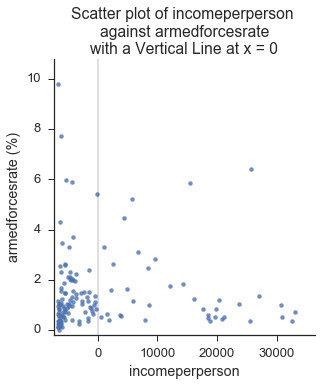

In [10]:
seaborn.set_context("notebook", font_scale=1.3)
seaborn.set_style("ticks")
seaborn.lmplot('incomeperperson_centered', 'armedforcesrate', data=gap_data, fit_reg=False)
plt.axvline(x=0,color = 'black',linewidth = 0.25)
plt.xlim([min(gap_data.incomeperperson_centered * 1.1),max(gap_data.incomeperperson_centered * 1.1)])
plt.ylim([min(gap_data.armedforcesrate - 0.2),max(gap_data.armedforcesrate * 1.1)])
plt.title('Scatter plot of incomeperperson \nagainst armedforcesrate\nwith a Vertical Line at x = 0')
plt.xlabel('incomeperperson')
plt.ylabel('armedforcesrate (%)')

In [11]:
regression_model = smf.ols(formula = 'armedforcesrate ~ incomeperperson', data = gap_data).fit()
regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        armedforcesrate   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.1403
Date:                Sat, 03 Dec 2016   Prob (F-statistic):              0.709
Time:                        16:44:46   Log-Likelihood:                -275.57
No. Observations:                 149   AIC:                             555.1
Df Residuals:                     147   BIC:                             561.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept           1.3467      0.154      8.732      0.000         1.042     1.651
incomeperperson   4.82e-06   1.29e-05      0.375      0.709     -2.06e-05  3.03e-05
==============================================================================
Omnibus:                      103.782   Durbin-Watson:                   2.259
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              605.964
Skew:                           2.637   Prob(JB):                    2.61e-132
Kurtosis:                      11.354   Cond. No.                     1.46e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This output gives us the values for the predictive linear model $ \hat y = \beta_0 + \beta_1 * x + \epsilon$ where $\hat y$ is the armedforcesrate variable, $x$ is the incomeperperson, $\epsilon$ is the error term, $\beta_0$ is -272.9147, and $\beta_1$ is 197.8278 giving us the formaula:
<div style = "text-align : center ; padding-top : 15px ;">$\hat y = 1.3796 + 0.00000482 * x + \epsilon$</div>

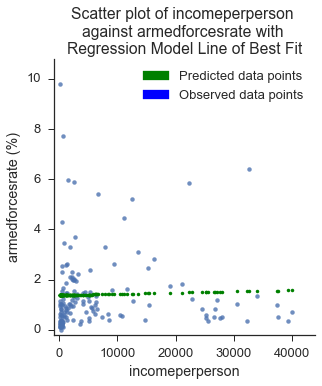

In [12]:
seaborn.set_context("notebook", font_scale=1.3)
seaborn.set_style("ticks")
seaborn.lmplot('incomeperperson', 'armedforcesrate', data=gap_data, fit_reg=False)
plt.xlim([min(gap_data.incomeperperson - 1000),max(gap_data.incomeperperson * 1.1)])
plt.ylim([min(gap_data.armedforcesrate - 0.2),max(gap_data.armedforcesrate * 1.1)])
plt.plot(gap_data.incomeperperson, 1.3796 + 0.00000482 * gap_data.incomeperperson, '.',color = 'green')
plt.title('Scatter plot of incomeperperson \nagainst armedforcesrate with \nRegression Model Line of Best Fit')
plt.xlabel('incomeperperson')
plt.ylabel('armedforcesrate (%)')
red_patch = mpatches.Patch(color='green', label='Predicted data points')
blue_patch = mpatches.Patch(color='blue', label='Observed data points')
plt.legend(handles=[red_patch, blue_patch])

<h2>Summary</h2>

None of the main assumptions of linear regression have been met for this model. From seeing the plot of observed values on-top-of the observed data we see the model is very inaccurate. The p-value of < 0.001 with a significance level of 70.9%, which is much greater than 5%, also implies that the model is not sifficient to fit the observed data effectively. <i>I have discussed the individual assumptions in more depth below.</i>

The regression coefficients are:
<div style = "margin-left : 50px ;">Intercept - 1.3796</div>
<div style = "margin-left : 50px ;">incomeperperson - 0.00000482</div>

The mean of my centered incomeperperson variable is printed to the console below. It is not exactly 0, but is practically 0.

In [13]:
gap_data.incomeperperson_centered.mean()

2.8261479659118507e-12

I will <i>not</i> discuss multi-collinearity or outliers as none of the main assumptions have been met and they are features to bear in mind rather than part of the main assumptions.

Considering the Linear Regression Assumptions:
<div style = "margin-left : 50px ; margin-top : 10px ;"><b>Normality</b>:</div>
<div style = "margin-left : 100px ; margin-top : 10px ;">Below is the process to check the residuals, I create a new column on my data set that is our predicted armedforcesrate values using our $\hat y$ formula. I then plot the armedforcesrate against the calculated residual values.</div>
<div style = "margin-left : 100px ; margin-top : 10px ;">I calculated the reidual values using $residual = y - \hat y$ where $y$ is our actual observations, and $\hat y$ are our perdicted values from the linear regression model that we fitted.</div>
<div style = "margin-left : 100px ; margin-top : 10px ;">We can see in the below graph that the residual values do not fit the shape of a normal distrobution. So the first assumption of linear regression is not met, so it is not an appropraite model for our data.</div>
<div style = "margin-left : 100px ; margin-top : 10px ;"><b>Note</b> that the residual plot below looks very similar to the original graph because the coefficient of the explanetory variable, incomeperperson, is so small.</div>

In [14]:
gap_data.loc[:,'predicted_armedforcesrate'] = pd.Series(1.3796, index = gap_data.index) + 0.00000482 * gap_data.loc[:,'incomeperperson']
residuals = (gap_data.loc[:,'armedforcesrate'] - gap_data.loc[:,'predicted_armedforcesrate'])

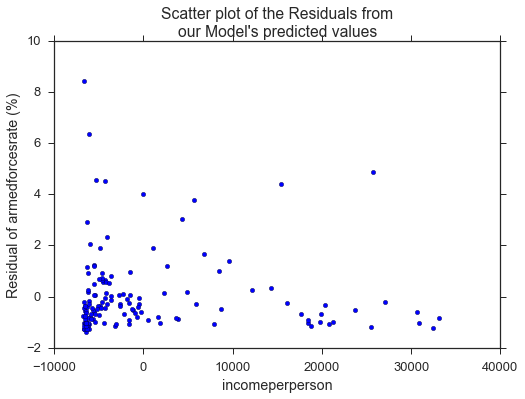

In [15]:
seaborn.set_context("notebook", font_scale=1.3)
seaborn.set_style("ticks")
#plt.xlim([min(gap_data.armedforcesrate - 0.2),max(gap_data.armedforcesrate * 1.03)])
plt.scatter(x = gap_data.incomeperperson_centered, y = residuals)
plt.title('Scatter plot of the Residuals from\nour Model\'s predicted values')
plt.xlabel('incomeperperson')
plt.ylabel('Residual of armedforcesrate (%)')

For completeness I will note / check the other assumptions.
<div style = "margin-left : 50px ; margin-top : 10px ;"><b>Linearity</b>:</div>
<div style = "margin-left : 100px ; margin-top : 10px ;">Assumption is that associations between the explanetory and response varaibles are linear. From looking at the graph of incomeperperson against armedforcesrate above we can see that it does not form an approximation to a linear trend.</div>
<div style = "margin-left : 100px ; margin-top : 10px ;">This means the assumption of linearity is most likely not met (we can't test to see if it is met). The first condition not being met would also suggest the association between the variables is not linear.</div>

<div style = "margin-left : 50px ; margin-top : 10px ;"><b>Homoscedasticity</b>:</div>
<div style = "margin-left : 100px ; margin-top : 10px ;">This requires constant variance in the response variable. So the plotting of the residuals should have the same spread.</div>
<div style = "margin-left : 100px ; margin-top : 10px ;">If we look at the residual plot above we see that there is an irregular funnel shape in the residuals, so the homoscedasticity assumption is not fullfilled.</div>

<div style = "margin-left : 50px ; margin-top : 10px ;"><b>Independence</b>:</div>
<div style = "margin-left : 100px ; margin-top : 10px ;">The data has been brought together from different sources, so the observations will not be correlated.</div>